<a href="https://colab.research.google.com/github/NinaMadu/Flight-Price-Prediction-ML/blob/main/GP_25_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airline Price Prediction**

### Project Title :
 Airline Price Prediction

###Group Number :
Group 25

###Names and Registration numbers :
 Maduwantha S.A.D.N - EG/2021/4664

 Ranasinghe E.W.G.I.S - EG/2021/4736

#Introduction :

Nowadays Predicting airline ticket pricing is essential for passengers and airlines in the dynamic travel industry. Accurately predicting ticket prices is still difficult due to the many variables that affect them, including airline, destination, and travel date. This project focuses on predicting airline ticket prices using a machine learning approach to help better understand the factors affecting these prices and to provide more accurate price estimations.

To achieve this, we employ two popular machine learning models: Linear Regression and Random Forest. We leverage an extensive Indian airline ticket price dataset from Kaggle, containing 300,261 entries across 11 features.
These features provide a comprehensive foundation for analyzing the various factors influencing ticket prices and evaluating the performance of each algorithm. Through this approach, we aim to determine the most effective model for predicting ticket prices and gain insights into the underlying dynamics of airline pricing.

# Literature Survey :

The problem of predicting flight prices has been addressed extensively in machine learning. Researchers and machine learning engineers have studied various algorithms and preprocessing techniques to enhance model performance. According to the researchers, this literature survey helps us select suitable approaches for this problem.

Most projects based on this problem have used the same techniques to handle missing values. Dropping null value records is the most common technique.[1] The other techniques are imputing the missing values and filling them with a mean or median according to the problem and the dataset.
 In most cases, box plots are used to identify the outliers. They use the Seaborn library for data visualization. After identifying the outliers, most of them use two techniques to treat outliers. Among those two, capping is recommended, and trimming is also used in some projects. But when using trimming, they were able to reach good performance when training.

 In this data set, there are few categorical features and those have been handled in the projects using various techniques. The one-hot encoding is used in most cases where categorical features have several unique values. To handle the features that have two unique values, binary encoding have used. And also when we look through the data there are different scales between data. Therefore most of the projects have used standardization or normalization to achieve feature scaling.

 When we look at the machine learning models that were used for this type of question the best performance can be seen with random forest models. Some projects have used linear regression and they also have got good performance scores.

 We have done this survey using Kaggle and the other websites related to machine learning projects. Most of the projects have used root mean squared error and mean absolute error to examine the performance of the model. The concepts from multiple initiatives are combined in this literature survey to provide a solid approach to solving the airline ticket price prediction problem.

# Dataset Description :

###Source of the Dataset
Kaggle

###Dataset size and Structure


*   Number of records - 300 261
*   Features - 11

###Features List

*   
airline - The name of the airline operating the flight ex:- Air India, IndiGo, SpiceJet
*   flight - The specific flight identifier or flight number


*   source_city - The city where the flight originates ex:- Delhi, Mumbai, Bengaluru
*   departure_time - The time at which the flight departs from the source city.


*   stops - The number of stops the flight makes before reaching the destination
*   destination_city - The city where the flight ends its journey ex:- Kolkata, Hyderabad, Chennai


*   arrival_time - The time when the flight lands at the destination
*   class - The travel class of the ticket


*   duration - The total flight time
*   days_left - The number of days remaining until the flight departs

###Target Variable
  

*   price(The cost of the ticket)


# Load the Necessary Libraries
We are using four python libraries in this project
1. numpy
    * A fundamental library for numerical computing in Python
2. pandas
    * A powerful library for data manipulation and analysis
3. matplotlib
    * A versatile library for creating static, interactive, and animated visualizations in Python
4. seaborn
    * A data visualization library built on top of Matplotlib

In [ ]:
#Load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the Data Set

The data set is stored in google drive. It should be mounted to acces the data set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Define the DataFrame of this project using the csv file of the dataset.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML_Project/Flight_Price_Dataset.csv')

Check whether the DataFrame is defined correctly.
head() function display the first five rows of the DataFrame

In [ ]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Check whether the entire DataFrame is available. tail() function displays the last 5 rows of the DataFrame

In [ ]:
df.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


The first column (Unnamed:0) is just indicating the indeces of the rows. It is not contatining any import data for the traing the model. Therefore that column is dropped from the DataFrame

In [ ]:
df = df.drop('Unnamed: 0',axis=1)

Check whether the column has been droped completely.

In [ ]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Exploratory Data Analysis (EDA)
The shape of the dataframe is identified in this section. we are examining and visualizing datasets to understand their structure, discover patterns, identify anomalies. EDA is used to summarize the main characteristics of the data, both quantitatively and visually. It helps us to selecting best appropriate models to the dataframe.

###Identifying the shape of dataframe

Checking the number records in dataframe

In [ ]:
#df.shape() gives and tuple that containing the shape of the dataframe
#shape[0] containing the number of records
print("Number of records: ",df.shape[0])


Number of records:  300153


Checking the number of features in the dataframe

In [ ]:
#shape[1] contains number of features of the dataset
print("Number of features: "),df.shape[1]

Number of features: 


(None, 11)

Taking the names of feautures of the dataframe

In [ ]:
#Retrive the names of the features with in an array
df.columns.tolist()

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'duration',
 'days_left',
 'price']

Checking the data types of the feautres and check the counts of not null values under each feature.

In [ ]:
#retrives the data type of each feature and the count of not null value count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


Identify categorical and numerical features seperately

using data type of the feature we can identify the numerical and categerical features.
* Numerical features : int, float
* Categorical features : object

In [ ]:
#print the categorical features seperately
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical features:", categorical_features)

#print the numerical features seperately
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical features:", numerical_features)


Categorical features: ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
Numerical features: ['duration', 'days_left', 'price']


Take a statistical summary of numerical data in the dataframe

In [ ]:
#using describe function to take a summary of numerical data.
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


From above summary count of the records, mean of the data, standard deviation of data, min values and max values and first/second & third quatiles of the dataframe has been retrived.  
Using these statistical values an idea about the distibution of numerical features can be taken.

The conclution that taken acording to above calculated statistical values
1. Duration
* We can the data who cantaings the flight duration from 0.83 to 49.83 hours. The most of the durations has fallen within 25% to 75% range. The avarage duration of the flight is 12.22 hours in the data.
The max duration shows an outlier behaviour with the value of 49.83 hours.

2. Days_left
* The median and the mean has come near values and the range of the data can be acceptable.

3. Price
* The price column has shown the largest variation. The price distribution has been skewed because the mean is much higher than the median. This is our target variable therefore it can have this type of varicance.




Identify the value counts of each category in categorical features

Check the value counts according to Airlines

In [ ]:
#value counts of airline
df.airline.value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


Check the value counts according to the departure city of the flights (source_city)

In [ ]:
#value counts of source_city
df.source_city.value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


Check the value counts according to the destination city of the flights (destination_city)

In [ ]:
#value counts of destination_city
df.destination_city.value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


Check the value counts according to departure times of the flights (departure_time)

In [ ]:
#value counts of departure_time
df.departure_time.value_counts()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


Check the value counts according to arrival times of the flights (arrival_time)

In [ ]:
#value counts of arrival_time
df.arrival_time.value_counts()

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


Check the value counts according to number of stops of the flights (stops)

In [ ]:
#value counts of stops
df.stops.value_counts()

,count
stops,
one,250863
zero,36004
two_or_more,13286


Check the value counts according to ticket class (class)

In [ ]:
#value counts of class
#since class is a keyword of python written as ['class']
df['class'].value_counts()

,count
class,
Economy,206666
Business,93487


Check the value count according to flight number (flight)

In [ ]:
#value counts of flight
df.flight.value_counts()

,count
flight,
UK-706,3235
UK-772,2741
UK-720,2650
UK-836,2542
UK-822,2468
...,...
6E-3211,1
6E-6474,1
6E-2914,1


**Conclutions about categorical**

* It can be seen that feactures like airline and source_city having a dominant category.
* Destination_city, stops and class have some categories with very low counts comparing to other categories.
* deparute_time and arrival time has shown a pattern. It should be depend on the operating hours of the flights with their destinations.

###Data Visualization###

#### Split Train and Test Sets ####

The dataframe should split into train and test sets before the nexts steps. After this we must work on the training and testing data set seperately.

Spliting the dataframe into train and test sets. Train data is used to training the mdoel and the test data is used for test the trained model. In the traing process we are not touching the test data. This is how we splite the dataframe
* X_train - Training data set without target variable
* X_test - Testing data set without target variable
* y_train - The data set with traget variable that used in training
* y_test - The data set with target variable that used in testing

In [ ]:
#import library for splitting data
from sklearn.model_selection import train_test_split

# Define X and y sets
X = df.drop(columns=['price'])  # Features
y = df['price']                 # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Check the number of reacords and the features of the training set

In [ ]:
# print the shape of train data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (240122, 10)
y_train shape: (240122,)


Check the number of records and the features of the testing set

In [ ]:
# print the shape of test data
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (60031, 10)
y_test shape: (60031,)


#### Visualizing the Training Data ###

Check how the target variable (Price) has been distributed.

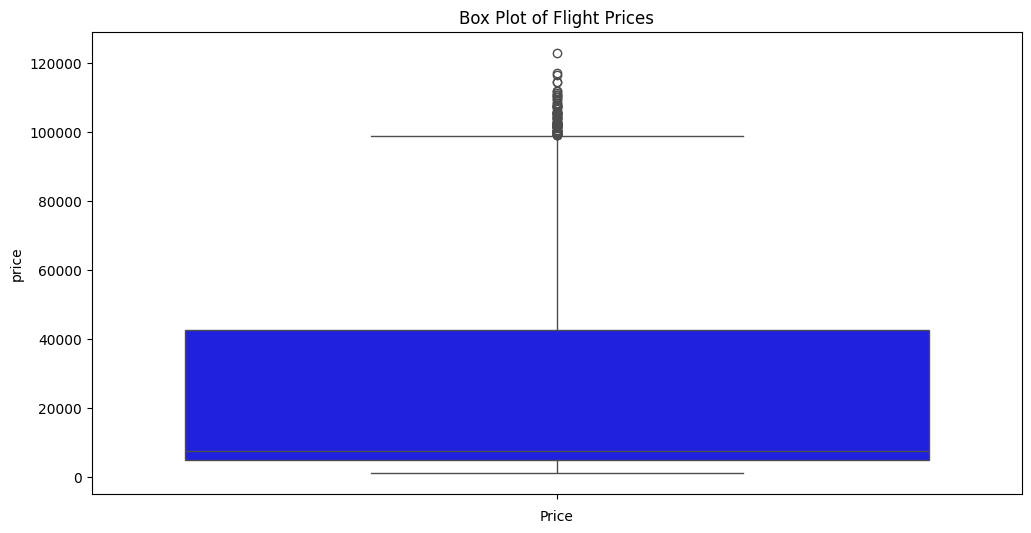

In [ ]:
# plot the box plot of price distribution
plt.figure(figsize=(12, 6))
sns.boxplot(y=y_train, color='blue')
plt.title('Box Plot of Flight Prices')
plt.xlabel('Price')
plt.show()


According to the box plot of price distribution we can see the majority of the price has dirtributed in range o to 40000 range. But the prices have distributed in large range (0-120000). Therefore we need to try another chart to catch the behaviour of the target variable.

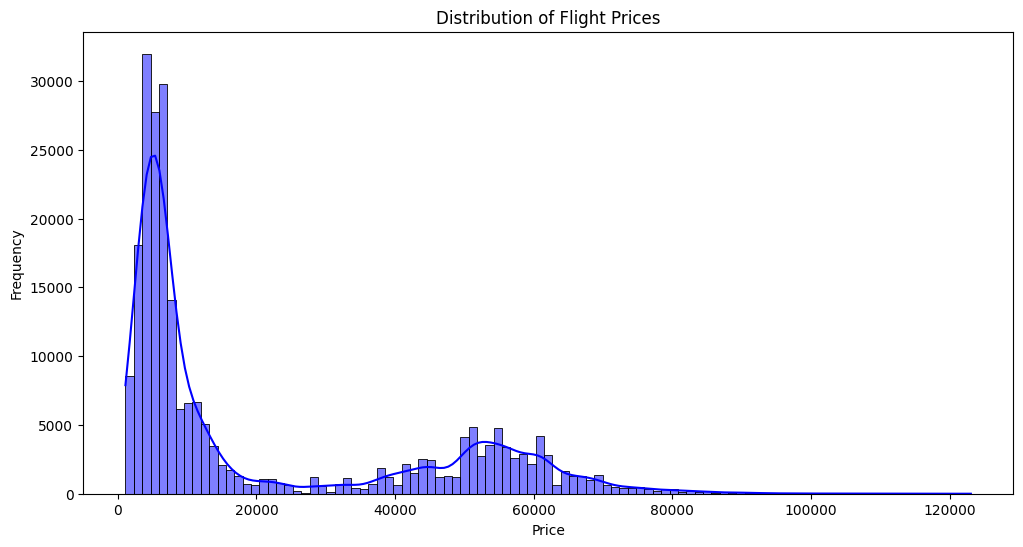

In [ ]:
# Plot a histogram of price distribution
plt.figure(figsize=(12, 6))
sns.histplot(y_train, kde=True, color='blue')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Using this graph we can ensure that the target variable has been skewed to the left. After the highest peak there is another range that the data is consentrated between 40000 to 60000 range. There can have some reasons for it.
I think the class of the flight ticket has been affected to this. We should observe the distribution of the price with the ticket class (Business, Economical)

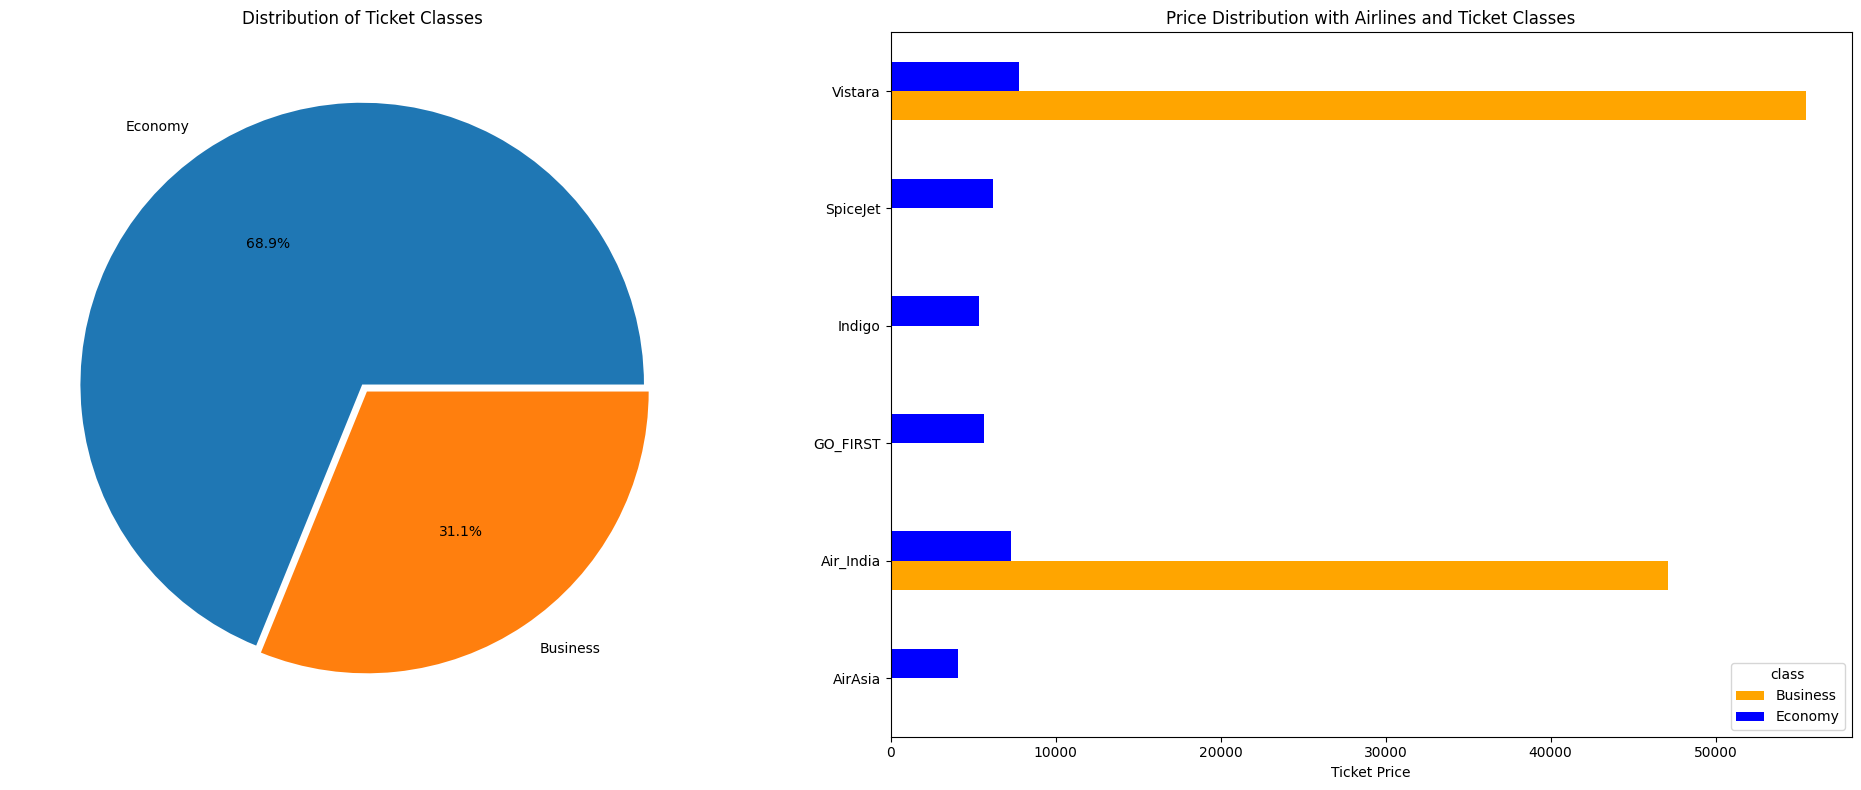

In [ ]:
# create train_data by combining x_train and y_train sets
train_data = pd.concat([X_train, y_train], axis=1)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].pie(
    labels=X_train["class"].value_counts().index,
    x=train_data["class"].value_counts().values,
    explode=[0, 0.03],
    autopct='%1.1f%%'
)
axes[0].set_title("Distribution of Ticket Classes")

# Grouping data according to airline and class
gb1 = train_data.groupby(["airline", "class"])[["price"]].mean().unstack()

# Correctly map colors to the columns
colors = {
    'Economy': 'blue',
    'Business': 'orange'
}

# Ensure the columns are correctly referenced
gb1.columns = gb1.columns.droplevel(0)
gb1.plot(kind="barh", ax=axes[1], color=[colors[col] for col in gb1.columns])

axes[1].set_title("Price Distribution with Airlines and Ticket Classes")
axes[1].set_ylabel("")
axes[1].set_xlabel("Ticket Price")

plt.tight_layout()
plt.show()


According to above graphs we can see there is less number of business class data comparing to economical class. In general business class ticket price is much higher than the economical class. This may be the main reason to that two two ranges of ticket prices has been shown.

Next distributions of other features should be examined to identify their behaviuor

<ipython-input-83-871fd4753c3a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='source_city', data=X_train, palette='viridis', ax=axes[0, 1])


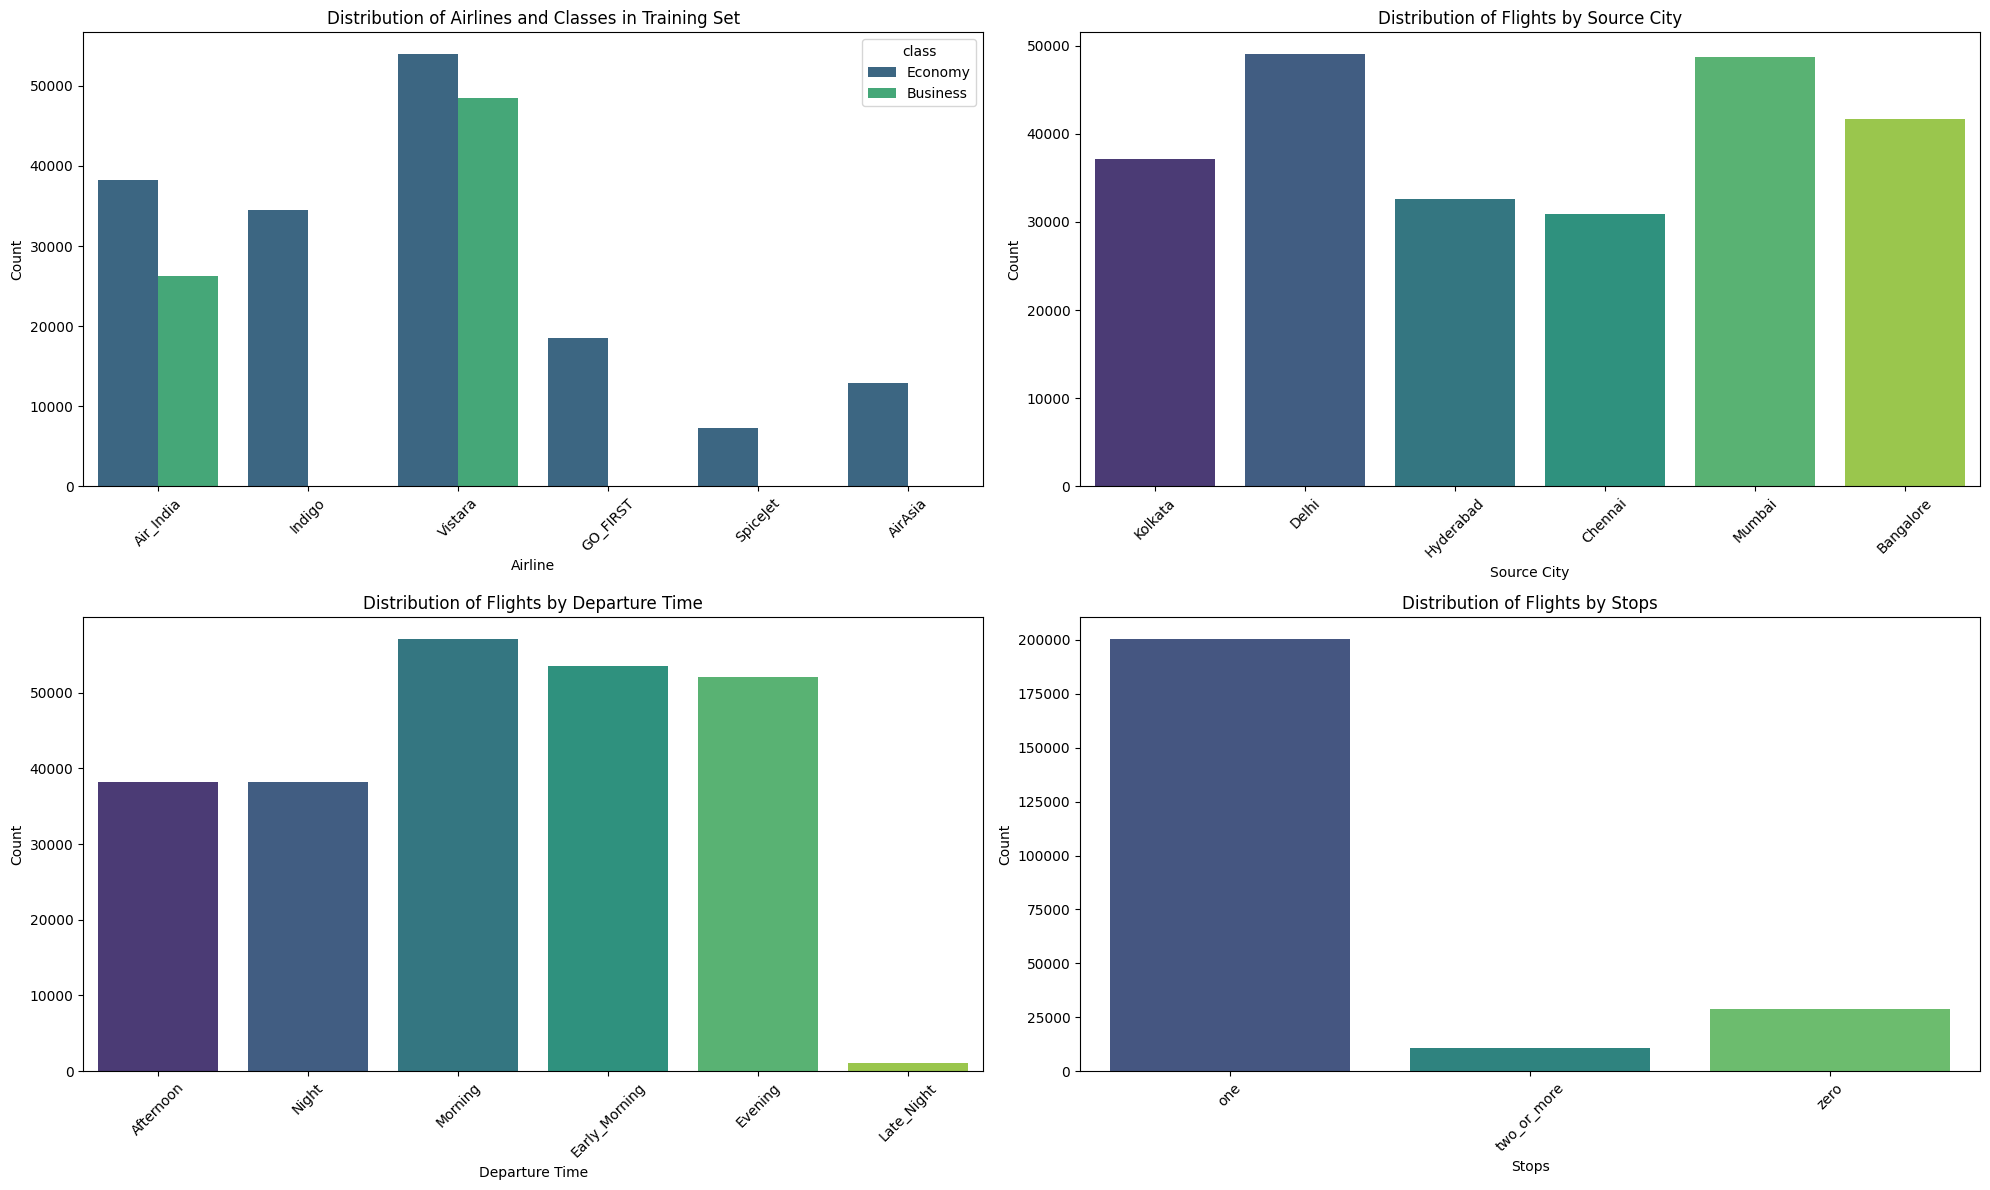

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12)) # 2 rows, 2 columns

# Distribution of airlines and classes in training set
sns.countplot(x='airline', hue='class', data=X_train, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Airlines and Classes in Training Set')
axes[0, 0].set_xlabel('Airline')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Distribution of flights by source city in training set
sns.countplot(x='source_city', data=X_train, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Flights by Source City')
axes[0, 1].set_xlabel('Source City')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# Distribution of flights by departure time training set
sns.countplot(x='departure_time', hue='departure_time', data=X_train, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Flights by Departure Time')
axes[1, 0].set_xlabel('Departure Time')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Distribution of Flights by Stops training set
sns.countplot(x='stops', hue='stops', data=X_train, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Flights by Stops')
axes[1, 1].set_xlabel('Stops')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

According to the  above four graphs can get an idea of distribution of each feature

1. Distribution of Airlines and Classes in Training Set
 * The graph shows balanced distribution in economical class data but only two airlines only have business class data. The reason of that is the airlines who havent business class data are budget airlines. They are only offering economical class tickets.

2. Distribution of Flights by Source City
 * This distribution has shown balanced distribution.

3. Distribution of Flights by Departure Time
 * The categories except of late night are balanced. But the late night has very less data comparing to the other categories. The reason of this may be during that time the flight operations are less.  

4. Distribution of Flights by Stops
 * This distribution is showing highly unbalanced data within there categories. This may be  affect to the training process.

Plot the days left to the flight date with price

<ipython-input-84-447b8852c58d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gb2.index, y=gb2["price"], palette='viridis',legend=False)


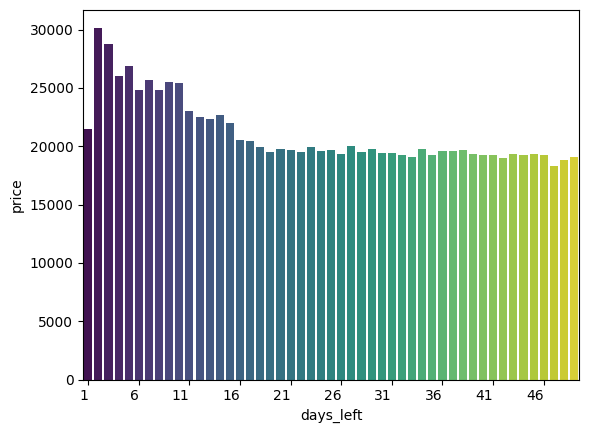

In [ ]:
# group train_data by days_left and price
gb2 = train_data.groupby("days_left")[["price"]].mean()

sns.barplot(x=gb2.index, y=gb2["price"], palette='viridis',legend=False)
# Used to show every 5th index on the X-axis. Alternatively, you could provide it as [0, 5, 10, 15, 20, 25, 30, 50].
plt.xticks(np.arange(0, len(gb2), step=5), ha='right')

plt.show()


This distribution shows well balanced feature. Therefore we should not do special processing for this feature.

Plotting the flying duration of the flight with airline

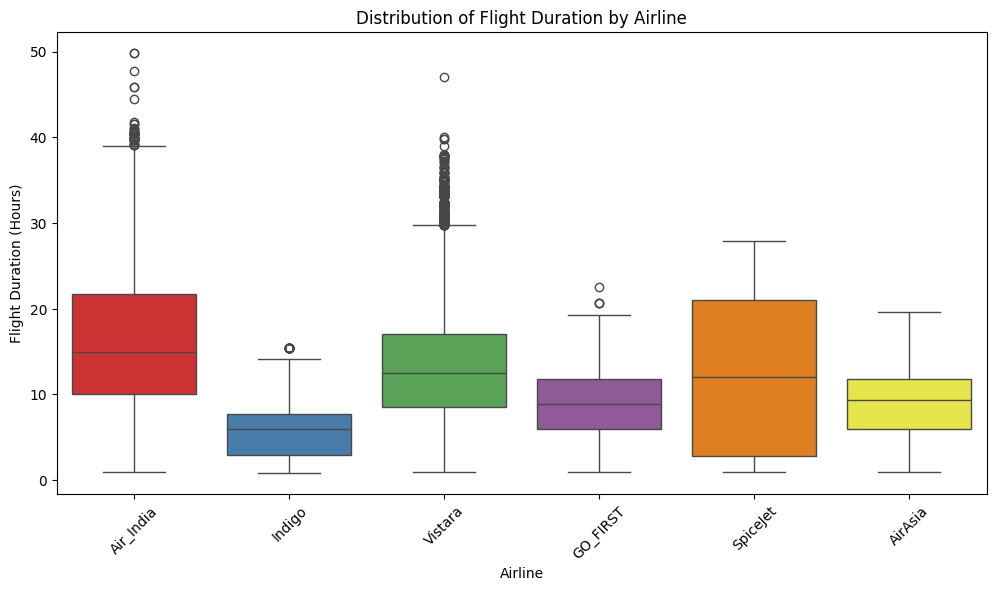

In [ ]:
# Plot the duration of flights by airlines using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='airline', y='duration', hue='airline', data=train_data, palette='Set1')
plt.title('Distribution of Flight Duration by Airline')
plt.xlabel('Airline')
plt.ylabel('Flight Duration (Hours)')
plt.xticks(rotation=45)
plt.show()

We can identify the many outliers in the categories Air_India and Vistara. There is anomal distribution in the graph beacause generaly there is not any flight tour availabe more tha 24 hours. This data points may be containing some errors. This data should be processes before using to training process.

#Data Preprocessing

Data preprocessing is a method used for creating a clean data set from the raw data. Raw data is rarely suitable for analysis or modeling. Therefore Data preprocessing is essential when training a machine learning model. Data preprocessing eliminates irrelevant or inconsistent data, such as duplicates, nulls or errors, that can degrade model performance.

##1.   Data type conversion

Data type conversion is one of essential step in data preprocessing which is used to speedup the process. And also memory optimization can be achieved from this.


In [ ]:
#Checking data types of the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
#convert numerical columns - int64 to int32
df['days_left'] = df['days_left'].astype('int32')
df['price'] = df['price'].astype('int32')


In [ ]:
#Again checking the datatypes of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int32  
 10  price             300153 non-null  int32  
dtypes: float64(1), int32(2), object(8)
memory usage: 22.9+ MB




##2.   Train-Test Split

Train-Test split is used to assess how well a machine learning model will generalize to unseen data. Here,



*   Training set - This is a subset of the dataset which is used to train the model. Model is learning from this seen data.
*   Test set - This is a subset of the dataset which is used to evaluate the model performance and this data is unseen.


*   Validation set - A validation dataset is used to estimate model performance while tuning the model's hyperparameters.


Our data set has already splited to train and test set before visualization.

In [ ]:
#Print the shapes of the resulting datasets to confirm the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (240122, 10)
X_test shape: (60031, 10)
y_train shape: (240122,)
y_test shape: (60031,)



#3.   Dropping unnecessary columns



Column 'Unnamed' has been droped in the data loading part.

In [ ]:
#unique value count of flight
df.flight.value_counts()

,count
flight,
UK-706,3235
UK-772,2741
UK-720,2650
UK-836,2542
UK-822,2468
...,...
6E-3211,1
6E-6474,1
6E-2914,1


The flight column has 1561 unique values as given by the above method. If we encoded that it will increase the dimensionality of the data and will make the dataset harder to interpret. Therefore dropping columns like this is preferrable and it will increase the model performance.

In [ ]:
#since flight has many distinct values we can drop that column
X_train = X_train.drop('flight',axis=1)
X_test = X_test.drop('flight',axis=1)

In [ ]:
# checking whether the unnecessary columns has been droped correclty in train set
X_train.sample(10)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
250942,Air_India,Bangalore,Afternoon,one,Night,Mumbai,Business,8.25,28
255843,Vistara,Bangalore,Early_Morning,one,Evening,Kolkata,Business,10.25,48
110666,AirAsia,Bangalore,Evening,zero,Evening,Hyderabad,Economy,1.33,11
228006,Vistara,Mumbai,Evening,zero,Night,Delhi,Business,2.17,31
206495,Vistara,Chennai,Morning,two_or_more,Night,Hyderabad,Economy,11.17,47
193776,Vistara,Chennai,Evening,one,Afternoon,Mumbai,Economy,20.58,49
137050,Air_India,Kolkata,Morning,two_or_more,Morning,Bangalore,Economy,21.33,13
189011,Indigo,Chennai,Morning,one,Afternoon,Mumbai,Economy,5.50,14
36142,Air_India,Delhi,Afternoon,one,Early_Morning,Chennai,Economy,16.83,8
13881,Vistara,Delhi,Afternoon,one,Evening,Bangalore,Economy,6.42,21


In [ ]:
#checking whether the unnecessary columns has been droped correclty in test set
X_test.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left'],
      dtype='object')



#4.   Handling null/missing values

Many machine learning models such as linear regression cannot handle missing values directly. This missing data can negatively impact the quality and accuracy of the machine learning. Therefore handling missing/null values is a cruicial step in the data preprocessing.



Pandas library provides functions to identify the missing values. Some of them are .isnull() , .notnull(), .isna()

We are using the isnull().sum() for getting the sum of null values in each columns

In [ ]:
#check for missing values in the train data attributes
X_train.isnull().sum()

,0
airline,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [ ]:
#check for missing values in the test data attributes
X_test.isnull().sum()

,0
airline,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [ ]:
#check for missing values in the target variable in train data
y_train.isnull().sum()

0

In [ ]:
#check for missing values in the target variable in test data
y_test.isnull().sum()

0

According to the above results, both training and test sets do not include any missing/null data.

If there were null values, we have to handle them. By using different approaches we can handle missing values. Some of them as below.
*   Delete rows/columns
*   Imputation
*   Interpolation
*   Predicting missing values





#Handle the categorical features

Categorical data is non-numeric data which represents variables that contain a discrete categories or labels. Since most machine learning algorithms can not handle categorical data, those data has to be converted to the numerical values. There are two types of categorical variables.


*   Nominal - No particular order
*   Ordinal - Has some order between values




In [ ]:
#identifying the categorical variables
categorical_columns = X_train.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class'],
      dtype='object')


According to the data analysis part for each attribute unique value count is as follows.



*   airline - 6
*   source_city - 6


*   destination_city - 6
*   arrival_time - 6


*   departure_time - 6
*   stops - 3

*   class - 2

 At first, since class attribute has only 2 values and since it has balanced, we can use binary encoding for handling categorical values.

In [ ]:
#binary encoding is used to handle categorical values in 'class' attribute
#Business -> 1
#Economy -> 0
X_train['class']=X_train['class'].apply(lambda x: 1 if x == 'Business' else 0)
X_test['class']=X_test['class'].apply(lambda x: 1 if x == 'Business' else 0)

In [ ]:
#show latest train set
X_train

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
148417,Air_India,Kolkata,Afternoon,one,Morning,Chennai,0,19.42,6
36879,Indigo,Delhi,Afternoon,two_or_more,Night,Chennai,0,7.00,13
274531,Air_India,Kolkata,Afternoon,one,Afternoon,Chennai,1,21.17,44
166397,Vistara,Hyderabad,Night,one,Early_Morning,Bangalore,0,10.25,11
272722,Vistara,Kolkata,Night,one,Night,Chennai,1,26.50,5
...,...,...,...,...,...,...,...,...,...
119879,Vistara,Kolkata,Evening,one,Afternoon,Delhi,0,20.50,2
259178,Vistara,Bangalore,Night,one,Night,Chennai,1,25.42,7
131932,Air_India,Kolkata,Night,one,Morning,Mumbai,0,13.67,29
146867,GO_FIRST,Kolkata,Afternoon,one,Night,Hyderabad,0,8.33,39


In [ ]:
X_train.sample(10)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
250541,Vistara,Bangalore,Morning,one,Night,Mumbai,1,14.08,23
34646,AirAsia,Delhi,Morning,one,Afternoon,Hyderabad,0,6.00,45
29797,Vistara,Delhi,Afternoon,one,Night,Hyderabad,0,6.67,10
32716,Vistara,Delhi,Early_Morning,one,Afternoon,Hyderabad,0,4.75,31
159527,Vistara,Hyderabad,Early_Morning,one,Night,Mumbai,0,12.58,10
210377,Vistara,Delhi,Early_Morning,one,Morning,Mumbai,1,5.50,35
211751,Air_India,Delhi,Night,one,Night,Mumbai,1,24.25,47
64202,Vistara,Mumbai,Afternoon,one,Evening,Kolkata,0,5.67,17
202934,Indigo,Chennai,Evening,one,Night,Hyderabad,0,3.92,6
126793,SpiceJet,Kolkata,Early_Morning,one,Evening,Delhi,0,10.67,45


Next when we consider the 'stops' attribute it has only three values named zero, one and two_or_more, we can use ordinal encoding to handle categorical values in there, because there is a clear order.

In [ ]:
#ordinal encoding is used to handle categorical values in 'stops' attribute. It assigns unique integer to each category
#zero -> 0
#one -> 1
#two_or_more -> 2

X_train.stops=pd.factorize(X_train.stops)[0]
X_test.stops=pd.factorize(X_test.stops)[0]

In [ ]:
#show latest train dataset
X_train.sample(10)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
97678,Air_India,Bangalore,Morning,0,Morning,Mumbai,0,22.67,22
78688,Indigo,Mumbai,Afternoon,0,Night,Chennai,0,7.33,12
226892,Air_India,Mumbai,Morning,0,Night,Delhi,1,14.42,20
126141,Air_India,Kolkata,Afternoon,0,Afternoon,Delhi,0,25.33,41
98362,AirAsia,Bangalore,Early_Morning,0,Night,Mumbai,0,16.08,26
125067,Vistara,Kolkata,Morning,0,Evening,Delhi,0,6.50,35
283816,Vistara,Hyderabad,Morning,0,Evening,Kolkata,1,7.75,20
188368,Vistara,Chennai,Morning,0,Night,Mumbai,0,13.08,9
157838,Vistara,Hyderabad,Morning,0,Evening,Delhi,0,5.50,44
81913,GO_FIRST,Mumbai,Evening,0,Late_Night,Chennai,0,5.92,34


In [ ]:
X_train.tail()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
119879,Vistara,Kolkata,Evening,0,Afternoon,Delhi,0,20.50,2
259178,Vistara,Bangalore,Night,0,Night,Chennai,1,25.42,7
131932,Air_India,Kolkata,Night,0,Morning,Mumbai,0,13.67,29
146867,GO_FIRST,Kolkata,Afternoon,0,Night,Hyderabad,0,8.33,39
121958,Air_India,Kolkata,Afternoon,0,Morning,Delhi,0,20.17,17


airline - 6

source_city - 6

destination_city - 6

arrival_time - 6

departure_time - 6

When considering the above features they do not have an inherent order, but still they need to be represented numerically for training the model. Since there attributes have any inherent order we can use one-hot encoding.

One-hot encoding converts each unique category in a specific attribute into a separate binary column

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

# List of categorical features
cat_features = ['airline', 'source_city', 'destination_city', 'arrival_time', 'departure_time']

# Define the encoder
transformer = make_column_transformer(
    (
        OneHotEncoder(drop='first', handle_unknown='ignore', dtype=np.int32, sparse_output=False),
        cat_features
    )
)

# Encode the training features
transformed_train = transformer.fit_transform(X_train)
transformed_train_df = pd.DataFrame(transformed_train, columns=transformer.get_feature_names_out())
transformed_train_df.index = X_train.index
X_train = pd.concat([X_train, transformed_train_df], axis=1)
X_train.drop(cat_features, axis=1, inplace=True)

# Encode the test features using the same transformer
# Here transform is used instead of fit_transform
transformed_test = transformer.transform(X_test)
transformed_test_df = pd.DataFrame(transformed_test, columns=transformer.get_feature_names_out())
transformed_test_df.index = X_test.index
X_test = pd.concat([X_test, transformed_test_df], axis=1)
X_test.drop(cat_features, axis=1, inplace=True)

# Display results
print("Transformed X_train:")
print(X_train.head())



Transformed X_train:
        stops  class  duration  days_left  onehotencoder__airline_Air_India  \
148417      0      0     19.42          6                                 1   
36879       1      0      7.00         13                                 0   
274531      0      1     21.17         44                                 1   
166397      0      0     10.25         11                                 0   
272722      0      1     26.50          5                                 0   

        onehotencoder__airline_GO_FIRST  onehotencoder__airline_Indigo  \
148417                                0                              0   
36879                                 0                              1   
274531                                0                              0   
166397                                0                              0   
272722                                0                              0   

        onehotencoder__airline_SpiceJet  onehotencoder__air

In [ ]:
# Display the category list for each feature
for feature, categories in zip(cat_features, transformer.named_transformers_['onehotencoder'].categories_):
    print(f"Feature: {feature}")
    print(f"Categories: {categories}")

Feature: airline
Categories: ['AirAsia' 'Air_India' 'GO_FIRST' 'Indigo' 'SpiceJet' 'Vistara']
Feature: source_city
Categories: ['Bangalore' 'Chennai' 'Delhi' 'Hyderabad' 'Kolkata' 'Mumbai']
Feature: destination_city
Categories: ['Bangalore' 'Chennai' 'Delhi' 'Hyderabad' 'Kolkata' 'Mumbai']
Feature: arrival_time
Categories: ['Afternoon' 'Early_Morning' 'Evening' 'Late_Night' 'Morning' 'Night']
Feature: departure_time
Categories: ['Afternoon' 'Early_Morning' 'Evening' 'Late_Night' 'Morning' 'Night']


In [ ]:
#Current feature list
X_train.columns

Index(['stops', 'class', 'duration', 'days_left',
       'onehotencoder__airline_Air_India', 'onehotencoder__airline_GO_FIRST',
       'onehotencoder__airline_Indigo', 'onehotencoder__airline_SpiceJet',
       'onehotencoder__airline_Vistara', 'onehotencoder__source_city_Chennai',
       'onehotencoder__source_city_Delhi',
       'onehotencoder__source_city_Hyderabad',
       'onehotencoder__source_city_Kolkata',
       'onehotencoder__source_city_Mumbai',
       'onehotencoder__destination_city_Chennai',
       'onehotencoder__destination_city_Delhi',
       'onehotencoder__destination_city_Hyderabad',
       'onehotencoder__destination_city_Kolkata',
       'onehotencoder__destination_city_Mumbai',
       'onehotencoder__arrival_time_Early_Morning',
       'onehotencoder__arrival_time_Evening',
       'onehotencoder__arrival_time_Late_Night',
       'onehotencoder__arrival_time_Morning',
       'onehotencoder__arrival_time_Night',
       'onehotencoder__departure_time_Early_Morning',

In [ ]:
X_test.columns

Index(['stops', 'class', 'duration', 'days_left',
       'onehotencoder__airline_Air_India', 'onehotencoder__airline_GO_FIRST',
       'onehotencoder__airline_Indigo', 'onehotencoder__airline_SpiceJet',
       'onehotencoder__airline_Vistara', 'onehotencoder__source_city_Chennai',
       'onehotencoder__source_city_Delhi',
       'onehotencoder__source_city_Hyderabad',
       'onehotencoder__source_city_Kolkata',
       'onehotencoder__source_city_Mumbai',
       'onehotencoder__destination_city_Chennai',
       'onehotencoder__destination_city_Delhi',
       'onehotencoder__destination_city_Hyderabad',
       'onehotencoder__destination_city_Kolkata',
       'onehotencoder__destination_city_Mumbai',
       'onehotencoder__arrival_time_Early_Morning',
       'onehotencoder__arrival_time_Evening',
       'onehotencoder__arrival_time_Late_Night',
       'onehotencoder__arrival_time_Morning',
       'onehotencoder__arrival_time_Night',
       'onehotencoder__departure_time_Early_Morning',

#Feature Scaling

This technique is used to keep the presented data in the features in a fixed range. Feature scaling prevents the algorithm from tending to treat larger values, higher and smaller values as the lower values. And this will make sure all features are given same consideration during the learning process.  

In [ ]:
#import standscaler from the sklearn to do standardizing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#Using fit_transform, it calculates statistics such as mean, standard deviation from the training set
#These are used to determine how to scale features
X_train[['duration', 'days_left']] = scaler.fit_transform(X_train[['duration', 'days_left']])

#But when considering test data, only transform is used to sacling. The reason behind that is test data is unseen.
#Therefore we cannot calculate separate statistics for the test data, which could lead to data leakage.
X_test[['duration', 'days_left']] = scaler.transform(X_test[['duration', 'days_left']])


In [ ]:
X_train.sample(10)

,stops,class,duration,days_left,onehotencoder__airline_Air_India,onehotencoder__airline_GO_FIRST,onehotencoder__airline_Indigo,onehotencoder__airline_SpiceJet,onehotencoder__airline_Vistara,onehotencoder__source_city_Chennai,...,onehotencoder__arrival_time_Early_Morning,onehotencoder__arrival_time_Evening,onehotencoder__arrival_time_Late_Night,onehotencoder__arrival_time_Morning,onehotencoder__arrival_time_Night,onehotencoder__departure_time_Early_Morning,onehotencoder__departure_time_Evening,onehotencoder__departure_time_Late_Night,onehotencoder__departure_time_Morning,onehotencoder__departure_time_Night
114429,2,0,-1.489128,1.104667,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
70889,0,0,2.183220,-1.474883,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
121901,0,0,0.619484,-0.664167,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
181553,0,0,-0.388257,-1.106376,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
151820,0,0,1.429847,1.104667,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
105993,0,0,1.707844,-0.074556,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
79162,0,0,0.630604,-0.811570,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
160305,0,0,0.537474,-0.811570,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
66173,0,0,1.314478,0.072847,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
70750,0,0,0.595854,-1.548584,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [ ]:
X_train.shape

(240122, 29)

In [ ]:
X_test.shape

(60031, 29)

#Treating Duplicate Records

Duplicate records are quite common in real world datasets. Those kind of records don't add additional value to the model. And also using them may decrease the speed of processing. Therefore when preprocessing data, it is prefferable to identify them and handle before train the model.

In [ ]:
# Combine X_train and y_train into a single DataFrame
combined = pd.concat([X_train, y_train], axis=1)


# Remove duplicate rows
duplicates = combined.duplicated()
combined[duplicates]

,stops,class,duration,days_left,onehotencoder__airline_Air_India,onehotencoder__airline_GO_FIRST,onehotencoder__airline_Indigo,onehotencoder__airline_SpiceJet,onehotencoder__airline_Vistara,onehotencoder__source_city_Chennai,...,onehotencoder__arrival_time_Evening,onehotencoder__arrival_time_Late_Night,onehotencoder__arrival_time_Morning,onehotencoder__arrival_time_Night,onehotencoder__departure_time_Early_Morning,onehotencoder__departure_time_Evening,onehotencoder__departure_time_Late_Night,onehotencoder__departure_time_Morning,onehotencoder__departure_time_Night,price
22170,2,0,-1.408508,-0.885271,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,5954
30759,2,0,-1.395999,-0.590466,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,2727
77975,2,0,-1.419628,-1.401181,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,5942
16311,2,0,-1.304259,0.441354,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,4501
203174,2,0,-1.523877,-1.253778,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,4202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18070,0,0,-1.013752,1.030965,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,4496
15708,2,0,-1.291749,0.220250,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,4500
225281,2,1,-1.395999,-1.548584,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,36700
214176,2,1,-1.315379,0.220250,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,32859


In [ ]:
# Remove duplicate rows
combined = combined.drop_duplicates()

# Split back into X_train and y_train
X_train_cleaned = combined.iloc[:, :-1]  # All columns except the last
y_train_cleaned = combined.iloc[:, -1]   # The last column

# Check the shapes of the cleaned datasets
print(f"Original X_train shape: {X_train.shape}, Cleaned X_train shape: {X_train_cleaned.shape}")
print(f"Original y_train shape: {y_train.shape}, Cleaned y_train shape: {y_train_cleaned.shape}")


Original X_train shape: (240122, 29), Cleaned X_train shape: (238695, 29)
Original y_train shape: (240122,), Cleaned y_train shape: (238695,)


In [ ]:
#current traning dataset shape without duplicates
X_train_cleaned.shape

(238695, 29)

In [ ]:
y_train_cleaned.shape

(238695,)

In [ ]:
X_test.shape

(60031, 29)

In [ ]:
# Combine X_test and y_test into a single DataFrame
combined_test = pd.concat([X_test, y_test], axis=1)


# Remove duplicate rows
duplicates = combined_test.duplicated()

In [ ]:
# Remove duplicates from the combined test dataset
combined_test = combined_test.drop_duplicates()

# Split back into X_test_cleaned and y_test_cleaned
X_test_cleaned = combined_test.iloc[:, :-1]  # All columns except the last
y_test_cleaned = combined_test.iloc[:, -1]   # The last column

# Check the shapes of the cleaned datasets
print(f"Original X_test shape: {X_test.shape}, Cleaned X_test shape: {X_test_cleaned.shape}")
print(f"Original y_test shape: {y_test.shape}, Cleaned y_test shape: {y_test_cleaned.shape}")


Original X_test shape: (60031, 29), Cleaned X_test shape: (59935, 29)
Original y_test shape: (60031,), Cleaned y_test shape: (59935,)


In [ ]:
X_test_cleaned.shape

(59935, 29)

#Treating Outliers

A data point that significantly differs from the rest of the data is called an outlier. It can be significantly greater or lower than the other data points and it's presence can significantly affect the outcomes of some machine learning algorithms like linear regression and logistic regression.
But in some cases such as fraud detection, outliers plays a crucial role.
When considering our case we are not going to do such kind of problem and therefore we have to detect outliers and treat them.


From the EDA part, using the box plot distribution we identified that duration feature has some amount of outliers.

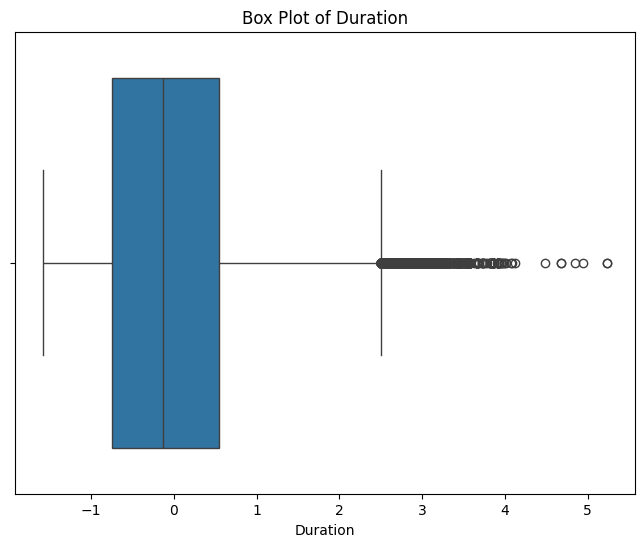

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for the 'duration' column
plt.figure(figsize=(8,6))
sns.boxplot(x=X_train_cleaned['duration'])

# Adding title and labels
plt.title('Box Plot of Duration')
plt.xlabel('Duration')

# Display the plot
plt.show()


As the technique for treating outliers, we chose trimming method. To use this technique we decided an upper threshold and a lower threshold and remove all the values not included in the range between upper and lower thresholds.

Number of outliers calculated using box plot as below.

In [ ]:
# Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR
Q1 = X_train_cleaned['duration'].quantile(0.25)
Q3 = X_train_cleaned['duration'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers in the 'duration' column
outliers = X_train_cleaned[(X_train_cleaned['duration'] < lower_bound) | (X_train_cleaned['duration'] > upper_bound)]
outliers = X_test_cleaned[(X_test_cleaned['duration'] < lower_bound) | (X_test_cleaned['duration'] > upper_bound)]

# Print the number of outliers
print(f"Number of outliers: {outliers.shape[0]}")




Number of outliers: 421


In [ ]:
# Concatenate X_train and y_train for easier trimming
train_combined = pd.concat([X_train_cleaned, y_train_cleaned], axis=1)
test_combined = pd.concat([X_test_cleaned, y_test_cleaned], axis=1)

# Define thresholds for trimming
lower_bound = 0
upper_bound = 30

# Filter out rows with outliers in the 'duration' column
train_combined = train_combined[(train_combined['duration'] >= lower_bound) & (train_combined['duration'] <= upper_bound)]
test_combined = test_combined[(test_combined['duration'] >= lower_bound) & (test_combined['duration'] <= upper_bound)]

# Separate back into X_train_cleaned and y_train_cleaned
X_train_cleaned = train_combined[X_train_cleaned.columns]
y_train_cleaned = train_combined[y_train_cleaned.name]  # Use y_train_cleaned.name to retain the column name
X_test_cleaned = test_combined[X_test_cleaned.columns]
y_test_cleaned = test_combined[y_test_cleaned.name]

# Check the result
print(f"Trimmed X_train size: {len(X_train_cleaned)}")
print(f"Trimmed y_train size: {len(y_train_cleaned)}")




Trimmed X_train size: 106275
Trimmed y_train size: 106275


#Model Implementation

###Linear Regression

As the first training model linear regression is selected. Linear regression is a fundamental and widely used supervised learning algorithm which is well suited for problems where target variable has continuous values. In our dataset, price is the target variable, therefore linear regression can be applied to this particular problem.


But linear regression has some limitations such as assumption of linearity, sensitivity to outliers etc. Therefore to avoid those kind of things, some techniques have been followed in the preprocessing section such as treating outliers.

In [ ]:
#Import necessary libraries for training the model using linear regression
from sklearn.linear_model import LinearRegression
#Import necessary libraries for evaluating metrics
from sklearn.metrics import r2_score

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train_cleaned, y_train_cleaned)


LinearRegression()

#Model Implementation

R^2 score is a statistical metrics used to evaluate the performance of regression models.

• R^2 value lies between 0 to 1 and a bigger value indicates a better fit between prediction and actual value.

• But R^2 value does not give any measure of bias, therefore sometimes we can have an overfitted model with a high R^2 value.


In [ ]:
# R² score for training set
train_r2 = model.score(X_train_cleaned, y_train_cleaned)
print(f"R² score on training set: {train_r2}")

# R² score for test set
test_r2 = model.score(X_test_cleaned, y_test_cleaned)
print(f"R² score on test set: {test_r2}")


R² score on training set: 0.9286567497070641
R² score on test set: 0.9264543196061863


##Other evaluation metrics

- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions on the training and test sets
train_predictions = model.predict(X_train_cleaned)
test_predictions = model.predict(X_test_cleaned)

# Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train_cleaned, train_predictions)
test_mse = mean_squared_error(y_test_cleaned, test_predictions)

# Root Mean Squared Error (RMSE)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train_cleaned, train_predictions)
test_mae = mean_absolute_error(y_test_cleaned, test_predictions)

# Print results
print(f"R² score on training set: {train_r2}")
print(f"R² score on test set: {test_r2}")
print(f"MSE on training set: {train_mse}")
print(f"MSE on test set: {test_mse}")
print(f"RMSE on training set: {train_rmse}")
print(f"RMSE on test set: {test_rmse}")
print(f"MAE on training set: {train_mae}")
print(f"MAE on test set: {test_mae}")



R² score on training set: 0.9286567497070641
R² score on test set: 0.9264543196061863
MSE on training set: 41479196.777612746
MSE on test set: 42878316.25575797
RMSE on training set: 6440.434517764523
RMSE on test set: 6548.153652424321
MAE on training set: 4412.921099933076
MAE on test set: 4512.609939826446


###GridSearchCV

GridSearchCV is used for hyperparameter tuning. In over case it helps to find the best hyperparameter for linear regression model.

In [ ]:
# Import gridsearchcv to tune the hyperparameters for better result
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False]  # Whether to calculate the intercept for the model
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # Number of cross-validation folds
    scoring='r2',  # Metric to evaluate performance
    verbose=1,  # Level of verbosity
    n_jobs=-1  # Use all available cores for cross-validation
)

# Perform grid search
grid_search.fit(X_train_cleaned, y_train_cleaned)

# Display the best hyperparameters and the corresponding R^2 score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Hyperparameters: {'fit_intercept': True}
Best R2 Score: 0.9286115603501864


In [ ]:
# Print best score for the training set and test set
print(grid_search.best_estimator_.score(X_train_cleaned, y_train_cleaned))
print(grid_search.best_estimator_.score(X_test_cleaned, y_test_cleaned))

0.9286567497070641
0.9264543196061863


According to the above results training data has achieved 92.86% accuracy and testing data has achieved 92.64% accuracy. Therefore we can obtain that no underfitting has occured.

And also, since there is no considerable difference between training and testing acccuracies, we can assume that no overfitting has occured.

###Random Forest

Random forest is used for both classification and regression problems. Therefore to train the model for airline price prediction, random forest can be used. This random forest algorithm gives high performance in many cases compared to other algorithms.

In [ ]:
# Define the random forest classifier with the default paramters
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest Regressor
rf = RandomForestRegressor()



In [ ]:
# Define the parameter grid for the grid search
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(1, 4))}]


In [ ]:
# Peform Grid Search to identify optimal parameters
clf = GridSearchCV(rf, forest_params, cv=3, scoring='r2', verbose=3)

In [ ]:
clf.fit(X_train_cleaned, y_train_cleaned)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3] END ......max_depth=10, max_features=1;, score=0.701 total time=   1.7s
[CV 2/3] END ......max_depth=10, max_features=1;, score=0.679 total time=   2.3s
[CV 3/3] END ......max_depth=10, max_features=1;, score=0.671 total time=   2.2s
[CV 1/3] END ......max_depth=10, max_features=2;, score=0.775 total time=   1.8s
[CV 2/3] END ......max_depth=10, max_features=2;, score=0.763 total time=   1.8s
[CV 3/3] END ......max_depth=10, max_features=2;, score=0.795 total time=   1.8s
[CV 1/3] END ......max_depth=10, max_features=3;, score=0.886 total time=   2.1s
[CV 2/3] END ......max_depth=10, max_features=3;, score=0.861 total time=   2.1s
[CV 3/3] END ......max_depth=10, max_features=3;, score=0.883 total time=   3.2s
[CV 1/3] END ......max_depth=11, max_features=1;, score=0.757 total time=   2.3s
[CV 2/3] END ......max_depth=11, max_features=1;, score=0.751 total time=   1.7s
[CV 3/3] END ......max_depth=11, max_features=1;

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [1, 2, 3]}],
             scoring='r2', verbose=3)

In [ ]:
# show best hyperparameters identified from the Grid Search
clf.best_params_

{'max_depth': 14, 'max_features': 3}

In [ ]:
# Print the mean cross-validated score of the best_estimator
clf.best_score_

0.9449771200395883

In [ ]:
# Use best estimator to predict on the training and test sets
y_train_pred = clf.best_estimator_.predict(X_train_cleaned)
y_test_pred = clf.best_estimator_.predict(X_test_cleaned)

# R² Score for training and test sets
train_r2 = r2_score(y_train_cleaned, y_train_pred)
test_r2 = r2_score(y_test_cleaned, y_test_pred)

# Mean Squared Error (MSE) for training and test sets
train_mse = mean_squared_error(y_train_cleaned, y_train_pred)
test_mse = mean_squared_error(y_test_cleaned, y_test_pred)

# Mean Absolute Error (MAE) for training and test sets
train_mae = mean_absolute_error(y_train_cleaned, y_train_pred)
test_mae = mean_absolute_error(y_test_cleaned, y_test_pred)

# Root Mean Squared Error (RMSE) for training and test sets
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Print the evaluation metrics
print(f"Training R²: {train_r2}")
print(f"Test R²: {test_r2}")
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Training MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Training RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Training R²: 0.947412717366559
Test R²: 0.9422602885502083
Training MSE: 30574416.43597812
Test MSE: 33663181.777683705
Training MAE: 4187.971666502223
Test MAE: 4339.167716998738
Training RMSE: 5529.413751563371
Test RMSE: 5801.998084943127


In [ ]:
# Use best estimator to obtain the accuracy for the test set
print(clf.best_estimator_.score(X_train_cleaned, y_train_cleaned))
print(clf.best_estimator_.score(X_test_cleaned, y_test_cleaned))

0.947412717366559
0.9422602885502083


#Model Evaluation and Discussion

##1. Linear Regression
Performance of linear regression model using various metrics and interpretation of the results are discussed below.

As evaluation metrics r square value, mean square value,  mean absolute value and root mean square value are used.

###Evaluation Metrics
####R² Score:

* Training R² score: 0.928656

* Test R² score: 0.926454

According to the result high R² score on the training set indicates that the model fits the training data well. And also high R² score on the test set indicates that the model fits the test data well. It indicates that the model generalizes well to unseen data without being overfitting.


 #### Mean Squared Error (MSE) and Root Mean Squared Error (RMSE):

* Training MSE: 41479196.7776

* Test MSE: 42878316.2557

* Training RMSE: 6440.4345

* Test RMSE: 6548.1536

According to the values for both MSE and RMSE on the training and test sets, we can suggest that the model predictions are close to the actual values. A large gap between training and test RMSE could indicate overfitting.


 #### Mean Absolute Error (MAE):

* Training MAE: 4412.9210

* Test MAE: 4512.6099

MAE provides a simple average of prediction errors. Lower MAE values indicate a better fit, and it is less sensitive to outliers compared to MSE.

###Observations
The model performs well on both training and test datasets, as indicated by mostly similar R² scores and low error metrics.

##2. Random Forest

###Evaluation Metrics
 R² Score:

* Training R² score: 0.945038

* Test R² score: 0.939774

Mean Squared Error (MSE) and Root Mean Squared Error (RMSE):

* Training MSE: 31954726.5535

* Test MSE: 35112216.2599

Mean Absolute Error (MAE):

* Training MAE: 4235.8459

* Test MAE: 4385.4182



# Conclusion #

In this project, two models have been used for predicting flight prices. Those are linear regression and Random forest algorithm. According to our observations on the evaluation matrices, the linear regression has shown a 0.9286 value on the training set and 0.9264 on the test set. This can be considered as a good performance for predicting flight ticket prices. The difference between the training score and testing score is 0.0022, Therefore we can conclude that the model is not overfitted or underfitted on the data set. The linear model can be considered as a suitable model for this problem.

After that, we used random forest model for prediction. It is an ensemble model and does not require more pre-processed data for that. Using our data we could get a 0.9450 score on training data and 0.9397 score on test data. This gives an incredible score on this problem. This means the model has not underfitted on the data frame. According to the difference between those scores (0.0053), we can see the model has not overfitted.

Therefore we can conclude that random forest is the best fitting model for this problem and it makes random forest the most suitable model for this problem.

# References #
A. Gupta, "Flight Price Prediction," Kaggle, Jun. 2021. [Online]. Available: https://www.kaggle.com/code/anshigupta01/flight-price-prediction.

E. Mohamed, "Flight Price Prediction," Kaggle, Jun. 2023. [Online]. Available: https://www.kaggle.com/code/eslammohamed100/flight-price-prediction.

D. A. Anardha, "Flight Fare Prediction: EDA & Regression (98.61%)," Kaggle, Aug. 2023. [Online]. Available: https://www.kaggle.com/code/danuaradityaanardha/flight-fare-prediction-eda-regression-98-61/notebook.




In [ ]:
!apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package texlive-generic-recommended


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving GP_25.ipynb to GP_25 (3).ipynb


In [ ]:
!apt-get install pandoc


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc-data
Suggested packages:
  texlive-latex-recommended texlive-xetex texlive-luatex pandoc-citeproc texlive-latex-extra
  context wkhtmltopdf librsvg2-bin groff ghc nodejs php python ruby libjs-mathjax libjs-katex
  citation-style-language-styles
The following NEW packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc pandoc-data
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 20.6 MB of archives.
After this operation, 156 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [115 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm-extensions0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [25.1 kB]


In [ ]:
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-generic-recommended

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package texlive-generic-recommended


In [ ]:
!apt-get update
!apt-get install -y xelatex
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-fonts-extra texlive-latex-recommended texlive-latex-extra


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,196 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [3,481 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-s

In [ ]:
!jupyter nbconvert --to pdf GP_25.ipynb


[NbConvertApp] Converting notebook GP_25.ipynb to pdf
[NbConvertApp] Support files will be in GP_25_files/
[NbConvertApp] Making directory ./GP_25_files
[NbConvertApp] Writing 177336 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 411659 bytes to GP_25.pdf


In [ ]:
from google.colab import files
files.download('GP_25.pdf')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!jupyter nbconvert --to html GP_25.ipynb


[NbConvertApp] Converting notebook GP_25.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 996077 bytes to GP_25.html


In [ ]:
files.download('GP_25.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>